<a href="https://colab.research.google.com/github/hassantariq64/crud/blob/master/Assignment_2_Question_1_part_2_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Iris Dataset: Species Classification</b></h1>

In [ ]:
#Importing required libraries
from sklearn.datasets import load_iris     #load Iris dataset from scikit's library
import pandas as pd                        #library for data manipulation and analysis
import numpy as np                         #library for mathematical calculation/arrays,matrices
import matplotlib.pyplot as plt            #plotting library
import seaborn as sns                      #advanced plotting library than matplotlib 
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve #accuracy getting libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,train_test_split  #hyperparameter tuning and data split 
from sklearn.tree import export_graphviz,DecisionTreeClassifier    #tree plotting library and tree classifier
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
import pydotplus
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h3> Load dataset and creating features/labels</h3>

In [ ]:
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [ ]:
#reloading iris dataset using sns to create pairplot later in notebook
iris1 = sns.load_dataset('iris')

In [ ]:
#dataframe containing features 
X = pd.DataFrame(iris.data[:,:], columns = iris.feature_names[:])

In [ ]:
#label
y = pd.DataFrame(iris.target,columns=['Species'])

<h4>Display initial records of features/labels</h4>

In [ ]:
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
print(y.head())

   Species
0        0
1        0
2        0
3        0
4        0


<h3> Data exploration- Find missing values/data type</h3>

In [ ]:
#check if we have missing values in columns
X.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [ ]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [ ]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3> Plotting feature correlation and feature/label relation</h3>

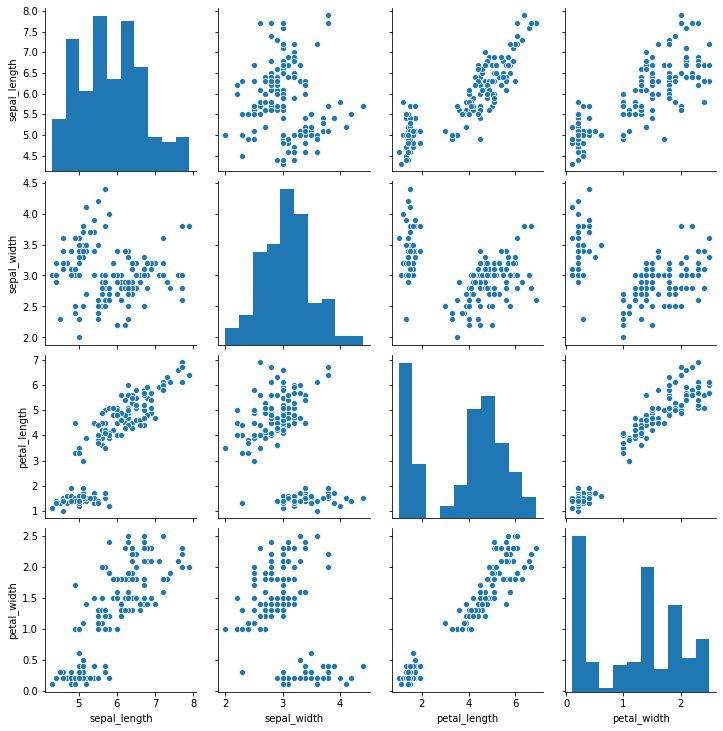

In [ ]:
sns.pairplot(iris1)

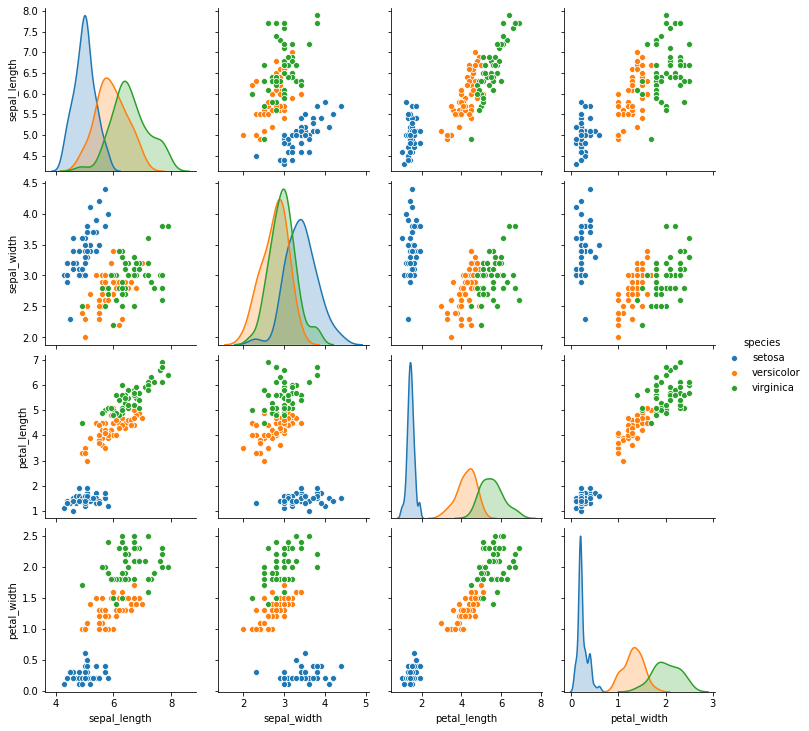

In [ ]:
sns.pairplot(iris1,hue='species')

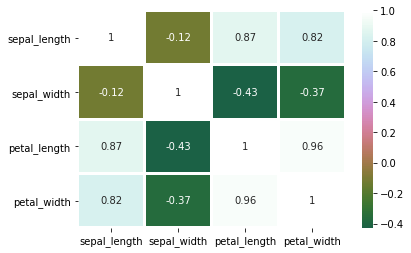

In [ ]:
#depict corr between features
sns.heatmap(iris1.corr(),annot=True,cmap='cubehelix',center=0,linewidths=1.9)


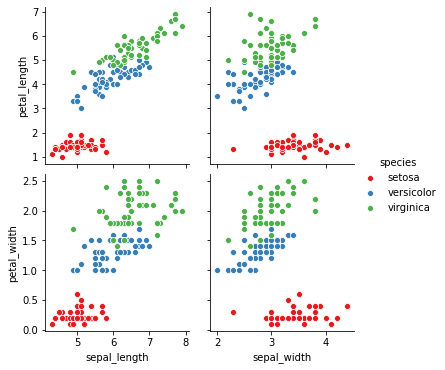

In [ ]:
#this plot depicts correlation between sepal length/width to petal length/width
sns.pairplot(iris1,x_vars=['sepal_length','sepal_width'], 
             y_vars=['petal_length','petal_width'],hue='species',palette='Set1')

<h3> Train/Test Split </h3>

In [ ]:
#splitting data into 70% train and 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

<h3> Build ML Model</H3>

In [ ]:
#create Decision tree object with max_depth 5
tree = DecisionTreeClassifier(max_depth = 5)

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h3> Plot the decision tree model using Graphwiz</h3>

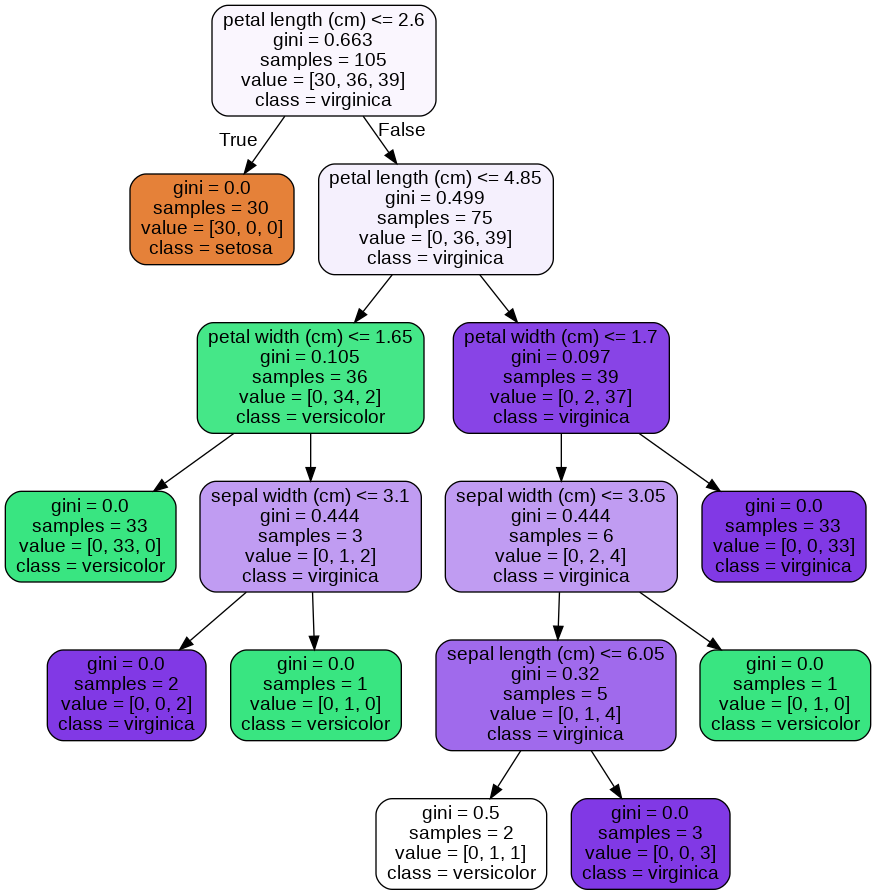

In [ ]:
export_graphviz(
            tree,
            out_file =  "myTreeName.dot",
            feature_names = list(X.columns),
            class_names = iris.target_names,
            filled = True,
            rounded = True)
graph = pydotplus.graph_from_dot_file('myTreeName.dot')
Image(graph.create_png())

<h3> Make prediction and check accuracy </h3>

In [ ]:
pred = tree.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.9555555555555556

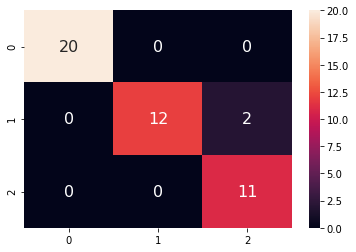



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.86      0.92        14
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
cnf = confusion_matrix(y_test, pred)
sns.heatmap(cnf,annot=True,annot_kws={"size":16})
plt.show()

print("\n")
print(classification_report(y_test, pred))